### 基于零假设的数值模拟

导入下面的数据，并按照以下问题回答下面的测试题目。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
# sample_data = full_data.sample(200)
# 被注释的这个代码在本专题中的意义是什么？

1. 如果你想知道喝咖啡的人的平均身高是否与不喝咖啡的人的平均身高相等，那么，你的零假设和备择假设是什么？将它们放在下面的单元格中，并使用你的答案来回答下面的第一个测试题目。

$$H_0: \mu_{coff} - \mu_{no} = 0$$

$$H_1: \mu_{coff} - \mu_{no} \neq 0$$

$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.

2. 如果你想知道喝咖啡的人的平均身高是否低于不喝咖啡的人的身高，那么，你的零假设和备择假设是什么？将它们放在下面的单元格中，并使用你的答案来回答下面的第二个测试题目。

$$H_0 :\mu_{coff} - \mu_{no} \geq 0$$ 
$$H_1 :\mu_{coff} - \mu_{no} < 0$$

3. 对于10,000次迭代：自展程序会对样本数据进行抽样，计算喝咖啡的人和不喝咖啡的人的平均身高，并计算每个样本的平均差异。你要在迭代结束时获取三个数组 - 一个是每个平均值，一个是所有平均值的差异。使用你的抽样分布结果，回答下面的第三个测试题目。

(array([  17.,  130.,  624., 1632., 2592., 2643., 1566.,  615.,  150.,
          31.]),
 array([65.10040289, 65.36836237, 65.63632185, 65.90428134, 66.17224082,
        66.4402003 , 66.70815978, 66.97611927, 67.24407875, 67.51203823,
        67.77999772]),
 <a list of 10 Patch objects>)

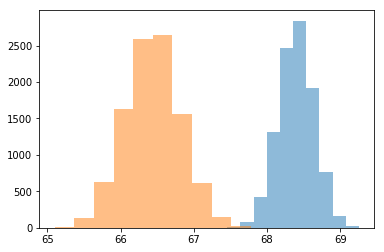

In [2]:
cof_mean =[]
no_cof_mean =[]
diffs = []
for _ in range(int(1e4)):
    botsamp = full_data.sample(200,replace=True)
    cof_ = botsamp.query('drinks_coffee == True').height.mean()
    no_cof = botsamp.query('drinks_coffee == False').height.mean()
    cof_mean.append(cof_)
    no_cof_mean.append(no_cof)
    diffs.append(cof_ - no_cof)

plt.hist(cof_mean,alpha = 0.5)
plt.hist(no_cof_mean,alpha = 0.5)

(array([   3.,   32.,  182.,  836., 2077., 2936., 2408., 1192.,  290.,
          44.]),
 array([0.01838011, 0.36225432, 0.70612852, 1.05000273, 1.39387694,
        1.73775114, 2.08162535, 2.42549956, 2.76937376, 3.11324797,
        3.45712218]),
 <a list of 10 Patch objects>)

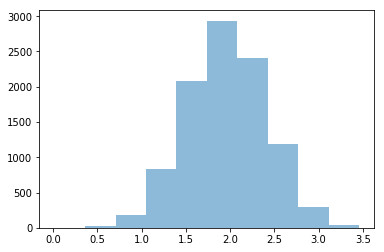

In [3]:
plt.hist(diffs,alpha =0.5)

In [4]:
np.std(cof_mean)

0.24324697856027053

In [5]:
np.std(no_cof_mean)

0.3773030833219241

In [8]:
np.std(diffs)

0.45106097044586535

4. 现在，使用你观察到的平均值差异抽样分布以及 [该文档](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) 来模拟：如果零假设是真的，你会期望抽样分布是什么样的。你可以通过重新定位0点分布来完成这个任务。另外，计算 在`sample_data`中观察到的样本均值差。用你的解决方案来回答下面测试题中的最后一个问题。

In [6]:
null_vals = np.random.normal(0,np.std(diffs),int(1e4))

(array([3.000e+00, 6.400e+01, 3.770e+02, 1.439e+03, 2.848e+03, 3.001e+03,
        1.692e+03, 4.930e+02, 7.500e+01, 8.000e+00]),
 array([-1.87065452, -1.5028021 , -1.13494968, -0.76709727, -0.39924485,
        -0.03139243,  0.33645999,  0.7043124 ,  1.07216482,  1.44001724,
         1.80786966]),
 <a list of 10 Patch objects>)

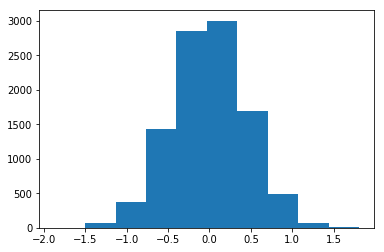

In [7]:
plt.hist(null_vals)